In [1]:
import torch
import torchvision
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split

In [ ]:
# Task Image Classification on CIFAR 10 dataset:
# Aproach : CNN (Convolution Neural Network)

In [2]:
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

100%|██████████| 135107811/135107811 [00:03<00:00, 40143471.79it/s]


In [3]:
import shutil
shutil.unpack_archive("/content/cifar10.tgz", "/content/data")

# # Extract from archive
# with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
#     tar.extractall(path='./data')

In [4]:
import os

data_dir  = "/content/data/cifar10"
print(os.listdir(data_dir))

['train', 'test']


In [5]:
classes = os.listdir(data_dir + "/train")
print(classes)

print("Training Data")

for x in os.listdir(data_dir  + "/train") :
  print( x , len(os.listdir(os.path.join(data_dir , "train" , x))) , end = ' | ' )

print("\nTesting Data")

for x in os.listdir(data_dir  + "/test") :
  print( x , len(os.listdir(data_dir + "/test/" + x)) , end = ' | ')

['deer', 'airplane', 'dog', 'ship', 'frog', 'automobile', 'cat', 'horse', 'bird', 'truck']
Training Data
deer 5000 | airplane 5000 | dog 5000 | ship 5000 | frog 5000 | automobile 5000 | cat 5000 | horse 5000 | bird 5000 | truck 5000 | 
Testing Data
deer 1000 | airplane 1000 | dog 1000 | ship 1000 | frog 1000 | automobile 1000 | cat 1000 | horse 1000 | bird 1000 | truck 1000 | 

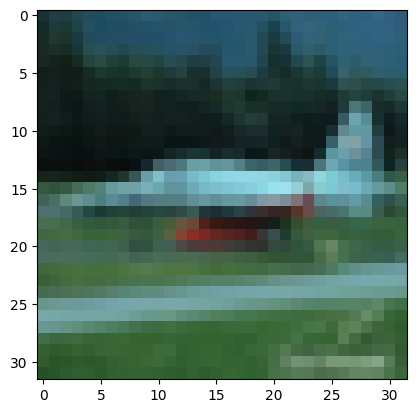

In [6]:
from torchvision.io import read_image
import torchvision.transforms as T

# read the png image
pic = read_image(data_dir + "/train/airplane/" + "2729.png")
plt.imshow(pic.permute(1,2,0))

In [7]:
#noob way of viewing data
# for path in os.listdir(data_dir + "/train/airplane") :
#   print(path)
#   break

#Note : Test Data Should be 20% of training

airplane_trainpath = os.listdir(data_dir + "/train/airplane")
print(len(airplane_trainpath))
print(airplane_trainpath[:5])

airplane_testpath = os.listdir(data_dir + "/test/airplane")
print(len(airplane_testpath))
print(airplane_testpath[:5])

5000
['1548.png', '3455.png', '4738.png', '3864.png', '1638.png']
1000
['0960.png', '0612.png', '0288.png', '0401.png', '0070.png']


In [8]:
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

trainpath = "/content/data/cifar10/train"
testpath = "/content/data/cifar10/test"

train_dataset = datasets.ImageFolder(trainpath, transform=transforms.ToTensor())
test_dataset = datasets.ImageFolder(testpath, transform=transforms.ToTensor())

Label : deer


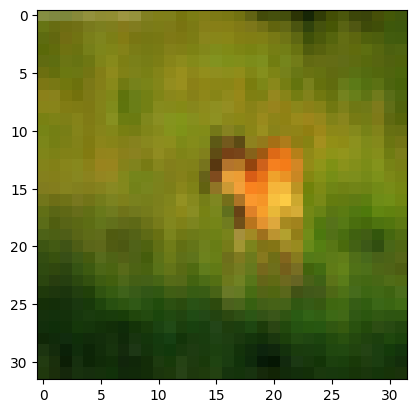

In [9]:
import os
import pdb
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

PATH = "/content/data/cifar10/train"


dataset = datasets.ImageFolder(PATH, transform=transforms.ToTensor())
dataloader = torch.utils.data.DataLoader(dataset, batch_size=500, shuffle=True)

images, labels = next(iter(dataloader))
tensor_image = images[1]
img = to_pil_image(tensor_image)
print(f"Label : {dataset.classes[labels[1]]}")
plt.imshow(img)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Dataset ImageFolder
    Number of datapoints: 50000
    Root location: /content/data/cifar10/train
    StandardTransform
Transform: ToTensor()
tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8

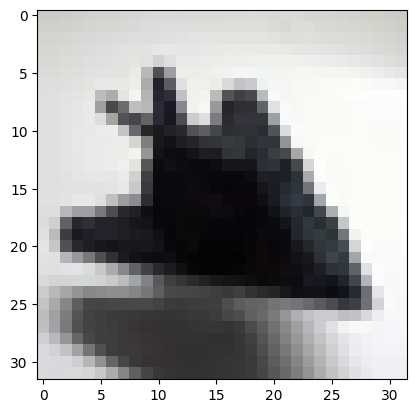

In [10]:
print(dataset.classes)
print(dataset)
img , label = dataset[0]
print(img)
print(img.shape)
print(label , dataset.classes[label])
plt.imshow(img.permute(1,2,0))

In [11]:
print(len(train_dataset) , len(test_dataset))

50000 10000


In [12]:
random_seed = 42
torch.manual_seed(random_seed) ;

In [13]:
val_size = 5000
train_size = len(train_dataset) - val_size

train_ds , val_ds = random_split(train_dataset , [train_size , val_size])
print(len(train_ds) , len(val_ds))

45000 5000


352 20
256 256 256 256 256 256 256 256 256 256 256 256 256 256 256 256 256 256 256 136 frog


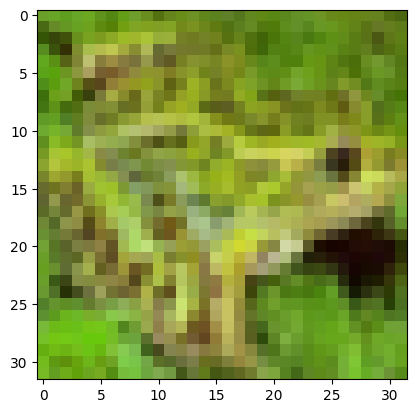

In [14]:
batch_size = 128

train_dl = DataLoader(train_ds , batch_size , shuffle = True , num_workers = 2 , pin_memory = True )
val_dl = DataLoader(val_ds , 2*batch_size , num_workers = 2 , pin_memory = True)

print(len(train_dl) , len(val_dl))

for x in val_dl :
  print(len(x[1]) , end = ' ')

for x , y in train_dl :
  print(dataset.classes[y[0]])
  plt.imshow(x[0].permute(1,2,0))
  break

2 256 256


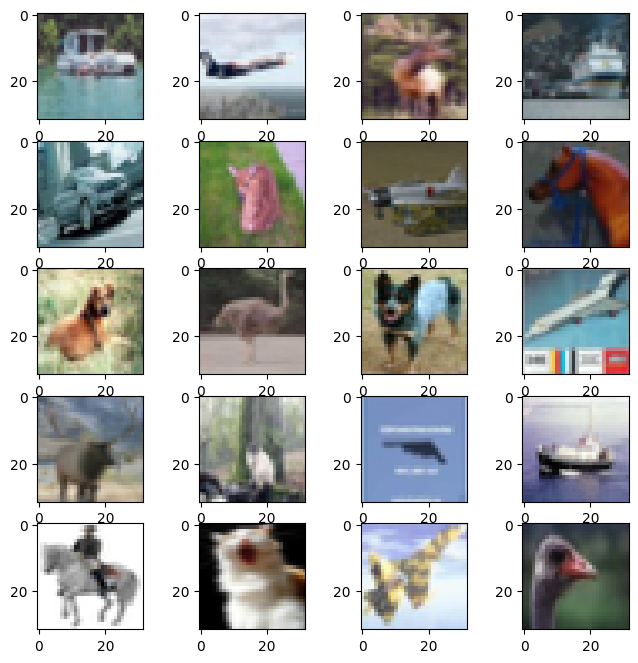

In [15]:
def show_batch(dl) :
  examples = next(iter(dl))
  images = examples[0]
  labels = examples[1]

  print(len(examples) , len(images) , len(labels))

  fig = plt.figure(figsize=(8, 8))
  columns = 4
  rows = 5
  for i in range(1, columns*rows +1):
      img = images[i]
      fig.add_subplot(rows, columns, i)
      plt.imshow(img.permute(1,2,0))
  plt.show()


show_batch(val_dl)


#refer to jovain way of make grid and represent data as well

In [16]:
import torch.nn as nn
import torch.nn.functional as F

In [17]:
for images , labels in train_dl :
  print(images.shape , labels.shape)
  break

torch.Size([128, 3, 32, 32]) torch.Size([128])


In [39]:
class ImageClassificationBase(nn.Module) :
  def training_step(self,batch) :
      images , labels = batch
      out = self(images)
      loss = F.cross_entropy(out,labels)
      return loss

  def validation_step(self,batch) :
    images , labels = batch
    out = self(images)
    loss = F.cross_entropy(out,labels)
    acc = accuracy(out,labels)
    return {'val_loss' : loss , 'val_acc' : acc}

  def validation_epoch_end(self,outputs) :
    batch_losses = [x['val_loss'] for x in outputs]
    batch_accuracy = [x['val_acc'] for x in outputs]

    epoch_loss = torch.stack(batch_losses).mean()
    epoch_acc = torch.stack(batch_accuracy).mean()

    return {'val_loss' : epoch_loss.item() , 'val_acc' : epoch_acc.item()}

  def epoch_end(self,epoch , result) :
    print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format( epoch, result['train_loss'], result['val_loss'], result['val_acc']))


In [19]:
def accuracy(outputs , labels) :
  values , indices = torch.max(outputs , dim = 1)
  return torch.tensor(torch.sum(indices == labels).item()/len(labels))

In [40]:
class Cifar10CNNModel(ImageClassificationBase) :
  def __init__(self):
    super().__init__()
    self.network = nn.Sequential(
        #input input , output channels (feature map) , kernel , stride , padding
        nn.Conv2d(3,32,kernel_size = 3, stride = 1, padding = 1) ,
        nn.ReLU() ,
        nn.Conv2d(32,64,kernel_size = 3, stride = 1, padding = 1) ,
        nn.ReLU(),
        nn.MaxPool2d(2,2) , #64 x 16 X 16



        nn.Conv2d(64,128,kernel_size = 3, stride = 1, padding = 1) ,
        nn.ReLU() ,
        nn.Conv2d(128,128,kernel_size = 3, stride = 1, padding = 1) ,
        nn.ReLU(),
        nn.MaxPool2d(2,2) , #128 X 8 X 8

        nn.Conv2d(128,256,kernel_size = 3, stride = 1, padding = 1) ,
        nn.ReLU() ,
        nn.Conv2d(256,256,kernel_size = 3, stride = 1, padding = 1) ,
        nn.ReLU(),
        nn.MaxPool2d(2,2) , #256 X 4 X 4

        nn.Flatten(),
        nn.Linear(256*4*4, 1024),
        nn.ReLU(),
        nn.Linear(1024,512),
        nn.ReLU(),
        nn.Linear(512,10)
    )

  def forward(self, xb):
        return self.network(xb)

In [41]:
model = Cifar10CNNModel()
model

Cifar10CNNModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

In [42]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

device = get_default_device()
device

device(type='cuda')

In [43]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [44]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

In [26]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [28]:
model = to_device(Cifar10CNNModel(), device)

In [46]:
evaluate(model, val_dl)

{'val_loss': 0.7909084558486938, 'val_acc': 0.7686810493469238}

In [37]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

In [45]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 1.7790, val_loss: 1.4771, val_acc: 0.4617
Epoch [1], train_loss: 1.2461, val_loss: 1.1625, val_acc: 0.5901
Epoch [2], train_loss: 0.9991, val_loss: 0.9436, val_acc: 0.6676
Epoch [3], train_loss: 0.8426, val_loss: 0.8848, val_acc: 0.6930
Epoch [4], train_loss: 0.7180, val_loss: 0.7790, val_acc: 0.7414
Epoch [5], train_loss: 0.6184, val_loss: 0.7527, val_acc: 0.7536
Epoch [6], train_loss: 0.5346, val_loss: 0.7527, val_acc: 0.7498
Epoch [7], train_loss: 0.4495, val_loss: 0.7350, val_acc: 0.7651
Epoch [8], train_loss: 0.3767, val_loss: 0.7971, val_acc: 0.7622
Epoch [9], train_loss: 0.3126, val_loss: 0.7909, val_acc: 0.7687
